# ENSF 611 - Project

**Project:** Kaggle's Titanic Machine Learning Competition<br>
**Author:** Aron Saengchan<br>
**Date:** December 6, 2021

## 1 Overview

 Kaggle's Titanic Machine Learning Competition is widely known as one of the best beginner machine learning competitions. As such, I undertook this opportunity to use this competition to improve and test my machine learning knowledge. This notebook contains a collection of the work, submissions and results for predicting if a given passenger survived this disaster based on a set of provided data.
 
 The first part of this notebook starts by walking though the procedures of importing and analyzing the data, both through general observation and graphical visualization, identifying aspects that may be relevant to what we are trying to accomplish. The second part follows the steps of properly transforming the data in making it more applicable for a number of supervised classification machine learning models. The four models that were tested include:
 - Logistic regression
 - Support vector classifier
 - Random forest regression
 - Gradient boosting

 After each model was tested and optimized, a submission of the results were uploaded onto Kaggle and the score of each was documented. These scores were used for final interpretation and reflection of the results to come to a conclusion on the topics that were investigated.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2 Importing the Data

To begin, we import the training data using the Titanic dataset provided by Kaggle. The datasets are located in the `data` folder. Following this, we can look at the quantity of data provided to us.

In [2]:
# Import the provided training dataset
data = pd.read_csv("./data/train.csv")

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print("Shape of dataset:", data.shape)
print("Type of dataset:", type(data))

Shape of dataset: (891, 12)
Type of dataset: <class 'pandas.core.frame.DataFrame'>


## 3 Analyzing the Data

### 3.1 Feature and Target Variables

According to [Kaggle](https://www.kaggle.com/c/titanic/data), each column of the original dataset represent the following:

| Variable   | Definition                        | Key                                            |
| ---------- | --------------------------------- | ---------------------------------------------- |
| `Survival` | Survival                          | 0 = No, 1 = Yes                                |
| `Pclass`   | Ticket class                      | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| `Sex`      | Sex                               |                                                |
| `Age`      | Age in years                      |                                                |
| `Sibsp`    | Number of siblings/spouses aboard |                                                |
| `Parch`    | Number of parents/children aboard |                                                |
| `Ticket`   | Ticket number                     |                                                |
| `Fare`     | Passenger fare                    |                                                |
| `Cabin`    | Cabin number                      |                                                |
| `Embarked` | Port of embarkation               | C = Cherbourg, Q = Queenstown, S = Southampton |

We can view information about the values in each column of the data. This will help us observe each of the data types and also determine which columns may need sone modification. The feature types consist of six numerical and five string features. In addition, it is noted that `Age`, `Cabin`, and `Embarked` contain some *null* values.

In [4]:
# Print the information about each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can divide these columns into either categorical, continuous, or mixed features:
- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`
- Continuous: `Age`, `Fare`, `Sibsp`, `Parch`
- Mixed: `Name`, `Ticket`, `Cabin` 

### 3.2 Significance of the Data

The distribution of features in each column of the feature matrix can also help used determine how representative the training dataset is of the actual problem domain.

In [5]:
# Distribution of numerical features for the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From this, we can gain some early insights on the numerical features:

- Around 38% of passengers in this dataset survived
- Most passengers belonged to second or third class
- Many of the passengers were in their 20s or 30s, with fewer elderly passengers
- Nearly 30% of the passengers had siblings and/or spouse aboard
- Most passengers (> 75%) did not travel with parents or children 
- Fares of the trip varied significantly

In [6]:
# Distribution of categorical features for the training data
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Fortune, Miss. Mabel Helen",male,1601,G6,S
freq,1,577,7,4,644


Likewise, with the categorical features, we can identify the following:

- Names were unique across the dataset
- Sex comprised of 65% male and 35% female passengers
- Cabin values have several duplicates across samples, assuming several passengers shared a cabin
- Southampton (S) port was used by most passengers
- Tickets had high ratio of duplicate values

### 3.3 Data Visualization

From the provided data, we can also visualize significant aspects of the features using plots. We can start by looking at the survival rate of the disaster. Features of interest for this analysis include survival of passengers based on `Age`, `Sex`, and `Pclass`. To start, we can observe the survival rate of this disaster. The plot below show that the majority of the passengers did not survive the voyage, with just only approximately 300 out of 800 people surviving.

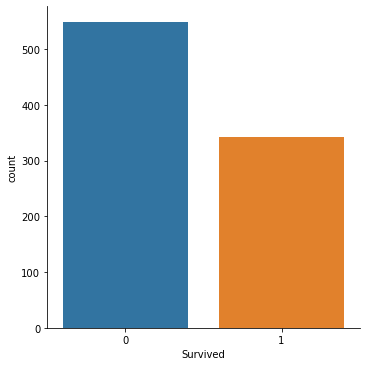

In [7]:
# Count of the passengers who did and did not survive
sns.catplot(x='Survived', data=data, kind='count');

A histogram of the age distribution can also provide some knowledgeable insights. Many of the passengers seem to fall between the ages of 20 and 40, which is unfortunately also the age brackets that contained the most fatalities. A higher amount infants and children were also spared as demonstrated in the first bin on the second plot. 

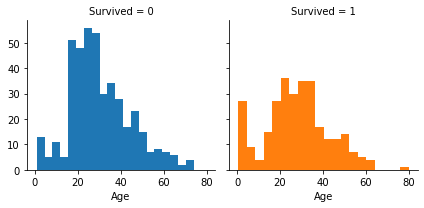

In [8]:
# Age distribution of passengers who did and did not survive
age_hist = sns.FacetGrid(data, col='Survived', hue='Survived')
age_hist.map(plt.hist, 'Age', bins=20);

A plot showing the survival count by passenger class also provides valuable information. Most passengers in first class and approximately nearly half in second class survived. In contrast, a huge majority of passengers in third class, at nearly 75%, were not able to survive.

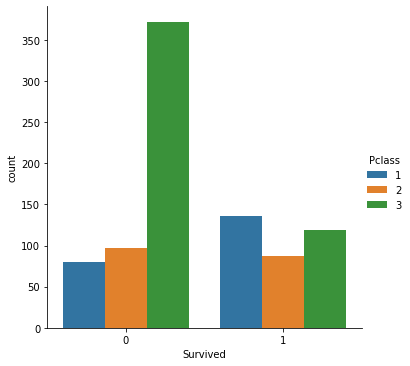

In [9]:
# Survival count based on passenger class
sns.catplot(x='Survived', data=data, kind='count', hue='Pclass');

The last plot below describes the survival count based on sex of the passenger. This plot clearly show that most of the deaths were male passengers, accounting for more than half of all fatalities. The majority of female passengers were able to survive the voyage, with more than two-thirds able to live to tell the tale.

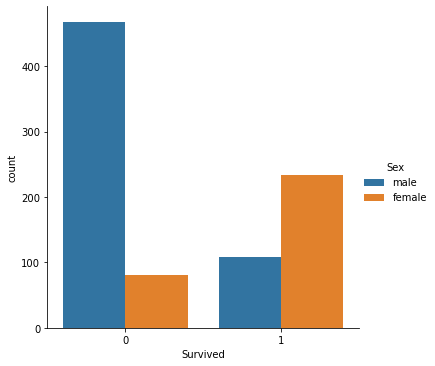

In [10]:
# Survival count based on sex
sns.catplot(x='Survived', data=data,kind='count', hue='Sex');

A lot of helpful insights were achieved by analyzing the data this way, both graphically and visually. This information will form the basis in transforming the data and developing our supervised machine learning models in the next stages.

## 4. Transforming the Data

### 4.1 Splitting the Data

As always, we begin by extracting the provided training and test datasets. For the training set, the feature and target matrices need to be separated. In this case, the the `Survived` columns tell us whether each passenger survived or not, so we must extract it from the DataFrame.

In [11]:
# Drop the 'Survived' column from the DataFrame
X_train = data.drop('Survived', axis=1)

X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
# Extract the 'Survived' column from the DataFrame
y_train = data['Survived']

y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
# Import the test dataset
X_test = pd.read_csv("./data/test.csv")

X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 4.2 Dropping Features

When handling the data for machine learning analysis, it is useful to identify which features will be more helpful for our purpose. First, we should identify the columns that may not be useful and drop those as required. In our case, we will drop the `PassengerId`, `Name`, `Ticket`, and `Cabin` features, as they are too unique to be implemented for our analysis or they contain too many *null* values to be workable.

In [15]:
# Drop the unused columns in the training data
X_train = X_train.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)

X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [16]:
# Drop the unused columns in the test data
X_test_pid = X_test['PassengerId']
X_test = X_test.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)

X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


### 4.3 Applying a Column Transformer

Now we need to deal with the existing columns that contain *null* values, which are the `Age` and `Embarked` columns for the training data, as well as `Fare` for the test data. For `Age` and `Fare`, we will take the average of all respective values for the missing data points. As for the `Embarked` column, we will use a one-hot encoder to represent each port in the next step when we use the column transformer. This will remove the missing values and also weigh each category equally for our analysis.

In [17]:
# Fill the missing values in the training data
X_train = X_train.fillna(value={'Age': pd.concat([X_train['Age'], X_test['Age']]).mean()})
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [18]:
# Fill the missing values in the test data
X_test = X_test.fillna(value={'Age': pd.concat([X_train['Age'], X_test['Age']]).mean(), 'Fare': pd.concat([X_train['Fare'], X_test['Fare']]).mean()})
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


Now that the data is formatted, we can use a column transformer to adjust selected column to be appropriate for our models. In this case, we use a one-hot encoder for the `Embarked` column and an ordinal encoder for the `Sex` column. This will allow us to use a pipeline when applying the machine learning classifiers.

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Creating a column transformer to the data
ct = ColumnTransformer(
    [("onehot", OneHotEncoder(sparse=False), ['Embarked']),
    ("ordinal", OrdinalEncoder(), ['Sex']),
    ("nothing", "passthrough", ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])])


## 5. Applying Machine Learning Models

### 5.1 Logistic Regression

To implement the logistic regression classifier, we can utilize the column transformer in the previous section and create a pipeline with it to go along with our model.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import set_config

# Constructing and fitting the pipeline
pipe = Pipeline([('preprocessing', ct), ('classifier', LogisticRegression(max_iter=1000))])
set_config(display='diagram')
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(sparse=False),
                                                  ['Embarked']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Sex']),
                                                 ('nothing', 'passthrough',
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

Now we can implement a grid search to find the best parameters for the logistic regression model. Here, we experiment with the `C` and `fit_intercept` parameters to find the optimal result.

In [21]:
from sklearn.model_selection import GridSearchCV

# Set up a parameter grid and apply a grid search
set_config(display='None')
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1.0, 10.0],
              'classifier__fit_intercept': [True, False]}
grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Embarked']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Sex']),
                                                                        ('nothing',
                                                                         'passthrough',
                                                                         ['Pclass',
                                                                          'Age',
                                                        

In [22]:
# Print best parameters and respective score
print("Best parameters: {}".format(grid.best_params_))
print("Best score: {:.2f}".format(grid.best_score_))

Best parameters: {'classifier__C': 1.0, 'classifier__fit_intercept': False}
Best score: 0.79


Finally, we can apply our model with the optimized parameters to predict the survival of passengers on the test data.

In [23]:
# Retrain the optimized model and predict
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

logreg = LogisticRegression(C=1.0, fit_intercept=False, max_iter=1000)
logreg.fit(X_train_trans, y_train)

y_pred = logreg.predict(X_test_trans)

In [28]:
# Create .csv file for test data prediction submission
logreg_submission = pd.DataFrame({'PassengerId': X_test_pid, 'Survived': y_pred})
logreg_submission.to_csv("./submissions/logreg_submission.csv", index=False)

The score of this submission for the linear regression model was **76.315%**.

<img src="./results/logreg_result.PNG"/>

To implement the support vector classifier, random forest, and gradient boosting models in the next sections, we can follow the general procedures used here.

### 5.2 Support Vector Machine

In [29]:
from sklearn.svm import SVC

# Constructing and fitting the pipeline
pipe = Pipeline([('preprocessing', ct), ('classifier', SVC())])
set_config(display='diagram')
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(sparse=False),
                                                  ['Embarked']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Sex']),
                                                 ('nothing', 'passthrough',
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('classifier', SVC())])

In [47]:
# Set up a parameter grid and apply a grid search
set_config(display='None')
param_grid = {'classifier__C': [1, 100, 1000, 10000, 100000],
              'classifier__gamma': [0.000001, 0.0001, 0.01, 1]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Embarked']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Sex']),
                                                                        ('nothing',
                                                                         'passthrough',
                                                                         ['Pclass',
                                                                          'Age',
                                                        

In [48]:
# Print best parameters and respective score
print("Best parameters: {}".format(grid.best_params_))
print("Best score: {:.2f}".format(grid.best_score_))

Best parameters: {'classifier__C': 10000, 'classifier__gamma': 0.0001}
Best score: 0.81


In [49]:
# Retrain the optimized model and predict
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

svc = SVC(C=10000, gamma=0.0001)
svc.fit(X_train_trans, y_train)

y_pred = svc.predict(X_test_trans)

In [50]:
# Create .csv file for test data prediction submission
svc_submission = pd.DataFrame({'PassengerId': X_test_pid, 'Survived': y_pred})
svc_submission.to_csv("./submissions/svc_submission.csv", index=False)

The score of this submission for the support vector classification model was **76.555%**.

<img src="./results/svc_result.PNG"/>

### 5.3 Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Constructing and fitting the pipeline
pipe = Pipeline([('preprocessing', ct), ('classifier', RandomForestClassifier())])
set_config(display='diagram')
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(sparse=False),
                                                  ['Embarked']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Sex']),
                                                 ('nothing', 'passthrough',
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('classifier', RandomForestClassifier())])

In [64]:
# Set up a parameter grid and apply a grid search
set_config(display='None')
param_grid = {'classifier__n_estimators': [200, 400, 600, 800, 1000],
              'classifier__max_depth': [5, 7, 9, 11, 13]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Embarked']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Sex']),
                                                                        ('nothing',
                                                                         'passthrough',
                                                                         ['Pclass',
                                                                          'Age',
                                                        

In [65]:
# Print best parameters and respective score
print("Best parameters: {}".format(grid.best_params_))
print("Best score: {:.2f}".format(grid.best_score_))

Best parameters: {'classifier__max_depth': 11, 'classifier__n_estimators': 800}
Best score: 0.83


In [67]:
# Retrain the optimized model and predict
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

randforest = RandomForestClassifier(max_depth=11, n_estimators=800)
randforest.fit(X_train_trans, y_train)

y_pred = randforest.predict(X_test_trans)

In [68]:
# Create .csv file for test data prediction submission
randforest_submission = pd.DataFrame({'PassengerId': X_test_pid, 'Survived': y_pred})
randforest.to_csv("./submissions/randforest_submission.csv", index=False)

The score of this submission for the random forest model was **77.751%**.

<img src="./results/randforest_result.PNG"/>

### 5.4 Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

# Constructing and fitting the pipeline
pipe = Pipeline([('preprocessing', ct), ('classifier', GradientBoostingClassifier(max_depth=5))])
set_config(display='diagram')
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(sparse=False),
                                                  ['Embarked']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Sex']),
                                                 ('nothing', 'passthrough',
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('classifier', GradientBoostingClassifier())])

In [72]:
# Set up a parameter grid and apply a grid search
set_config(display='None')
param_grid = {'classifier__n_estimators': [100, 200, 300],
              'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Embarked']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Sex']),
                                                                        ('nothing',
                                                                         'passthrough',
                                                                         ['Pclass',
                                                                          'Age',
                                                        

In [74]:
# Print best parameters and respective score
print("Best parameters: {}".format(grid.best_params_))
print("Best score: {:.2f}".format(grid.best_score_))

Best parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
Best score: 0.83


In [75]:
# Retrain the optimized model and predict
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

gradboost = GradientBoostingClassifier(max_depth=5, learning_rate=0.1, n_estimators=200)
gradboost.fit(X_train_trans, y_train)

y_pred = gradboost.predict(X_test_trans)

In [77]:
# Create .csv file for test data prediction submission
gradboost_submission = pd.DataFrame({'PassengerId': X_test_pid, 'Survived': y_pred})
gradboost_submission.to_csv("./submissions/gradboost_submission.csv", index=False)

The score of this submission for the gradient boosting model was **75.358%**.

<img src="./results/gradboost_result.PNG"/>

## 6 Conclusion

### 6.1 Results Summary

A summary of results for each tested machine learning model is presented in the following table.

| Model                       | Score (%) | 
| --------------------------- | --------- | 
| Linear regression           | 76.315    | 
| Support vector machine      | 76.555    |
| Random forest               | 77.751    | 
| Gradient boosting           | 75.385    |

### 6.2 Interpretation of Results

In this investigation, machine learning techniques were applied to Kaggle's Titanic dataset to determine if a given passenger survived or did not survive the disaster. The provided data was first imported, analyzed, and visualized to gain more insight on the problem and determine an effective plan of action. The dataset was then modified to be more workable by encoding features, addressing empty values, and removing irrelevant information. Four different supervised machine learning classifiers were used in this analysis - linear regression, support vector classifier, random forest, and gradient boosting.

Each machine learning model was put to the test using column transformer to arrange the features and grid search to find the optimal hyperparameters. After training each model, they were applied to the given testing data and submitted on Kaggle's competition page to obtain the accuracy score. The results achieved by each model did not vary by much and each were typically found to underfit the data, as the score were a bit less than the training score. The random forest classifier slightly outperformed the other three models, obtaining a score of 77.751%. This was then followed by the support vector machine, linear regression, and gradient boosting model. Overall, these model score decently well in predicting the survival of passengers aboard the Titanic.

Although this is a good start, there is also certainly much to be improved with these models in order to achieve better scores. With more time, there are a couple of modification that could be made for this project, both in feature extraction and model tuning. One aspect of the features that was completely removed from the beginning was the `Name` column. Many of the names listed here contain certain title (Miss, Mr., Mrs., etc.). This a one feature that could potentially remain if handled and implemented methodically. Another addition that could help when handling the data and in optimizing the model is using a scaler. Depending on the model, a scaler could have definitely been implemented and possibly improve the results, especially for a model like the support vector classifier.

### 6.3 Reflection
This competition was a was a good way to showcase what I have learned over the past semester and test my knowledge. It was interesting to walk through the entire process of using real-world data to build supervised machine learning models on my own. After completing this project, I better understand the importance of properly analyzing and manipulating data, realizing that the choices you make on presenting the input data to the model can ultimately determine the effectiveness of it. I also learned how to implement useful tools provided by sci-kit such as the column transformer and grid search to improve my workflow and build more robust machine learning models.

Unfortunately, time did not permit me to implement everything I would have like to. One task that I was not able to complete was attempting to ensemble some models together. This would involve combining a set of models in order to maximize the potential of each and attain a better score. Along with the improvement listed in the previous section, this is a feature that I hope to implement when I revisit this competition again and I hope to really improve upon what I accomplished so far.

Overall, I really enjoyed this project, as I've always been fascinated with machine learning in general in predicting real-world data. I hope to a lot more about learn machine learning in the future and potentially attempt more advanced projects and competitions on my own. Thank you for providing means and the opportunity for us to undertake a project such as this!